# Import libraries

In [1]:
import matplotlib.pyplot as plt
import os.path
import sklearn.cluster
import sklearn.mixture
import sklearn.datasets
import numpy as np
import pandas as pd
import time
import seaborn as sns
%matplotlib inline
sns.set_palette('Paired', 13)
sns.set_color_codes()

# Defining benchmarking function (based on https://hdbscan.readthedocs.io/en/latest/performance_and_scalability.html)

In [2]:
def benchmark_sklearn(dataset_sizes, cluster_function, function_args, function_kwds, plusplus=False, dataset_dimension=10, dataset_n_clusters=10, max_time=45, sample_size=2):
    # Get names of the module and algorithm
    module_name="sklearn"
    algorithm_name=str(cluster_function).partition('(')[0].rsplit('.',1)[1].split()[-1]

    # Initialize the result with NaNs so that any unfilled entries
    # will be considered NULL when we convert to a pandas dataframe at the end
    result = np.nan * np.ones((len(dataset_sizes), sample_size))
    mean = np.nan * np.ones(len(dataset_sizes))
    for index, size in enumerate(dataset_sizes):
        for s in range(sample_size):
            # Use sklearns make_blobs to generate a random dataset with specified size
            # dimension and number of clusters
            data, labels = sklearn.datasets.make_blobs(n_samples=size,
                                                       n_features=dataset_dimension,
                                                       centers=dataset_n_clusters)

            print("Fitting "+algorithm_name+" for "+str(size)+" data points "+str(s))
            # Start the clustering with a timer
            start_time = time.time()
            cluster_function(data, *function_args, **function_kwds)
            time_taken = time.time() - start_time
            # If we are taking more than max_time then abort -- we don't
            # want to spend excessive time on slow algorithms
            if time_taken > max_time:
                result[index, s] = time_taken
                mean[index] = np.mean(result[index, ])
                return pd.DataFrame(np.vstack([dataset_sizes,
                                               mean.flatten()]).T, columns=['sample_size',algorithm_name+"_"+module_name])
            else:
                result[index, s] = time_taken
        mean[index] = np.mean(result[index, ])

    # Return the result as a dataframe for easier handling with seaborn afterwards
    return pd.DataFrame(np.vstack([dataset_sizes,
                                   mean.flatten()]).T, columns=['sample_size',algorithm_name+"_"+module_name])


# Small datasize test

First test on the smallest datasize

In [3]:
# Define different dataset sizes
small_dataset_sizes=np.hstack([np.arange(1, 6) * 500, np.arange(3,7) * 1000, np.arange(4,17) * 2000])

# Fit algorithms

affinity = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.AffinityPropagation().fit, (), {}, sample_size=5)

agglomerative = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.AgglomerativeClustering(10).fit, (), {}, sample_size=5)

birch = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.Birch().fit, (), {}, sample_size=5)

dbscan = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.DBSCAN().fit, (), {}, sample_size=5)

kmeans = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.KMeans(10, init="k-means++", n_init=1).fit, (), {}, sample_size=5)

bisecting_kmeans = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.BisectingKMeans(10, init='k-means++', n_init=1).fit, (), {}, sample_size=5)

minibatch_kmeans = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.MiniBatchKMeans(10, init="k-means++", n_init=1).fit, (), {}, sample_size=5)

meanshift = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.MeanShift().fit, (), {}, sample_size=5)

optics = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.OPTICS().fit, (), {}, sample_size=5)

spectral_clust = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.SpectralClustering(10).fit, (), {}, sample_size=5)

spectral_biclut = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.SpectralBiclustering(10).fit, (), {}, sample_size=5)

spectral_coclust = benchmark_sklearn(small_dataset_sizes, sklearn.cluster.SpectralCoclustering().fit, (), {}, sample_size=5)

gmm = benchmark_sklearn(small_dataset_sizes, sklearn.mixture.GaussianMixture(10).fit, (), {}, sample_size=5)

Fitting AffinityPropagation for 500 data points 0
Fitting AffinityPropagation for 500 data points 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 500 data points 2
Fitting AffinityPropagation for 500 data points 3
Fitting AffinityPropagation for 500 data points 4
Fitting AffinityPropagation for 1000 data points 0
Fitting AffinityPropagation for 1000 data points 1
Fitting AffinityPropagation for 1000 data points 2
Fitting AffinityPropagation for 1000 data points 3
Fitting AffinityPropagation for 1000 data points 4
Fitting AffinityPropagation for 1500 data points 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 1500 data points 1
Fitting AffinityPropagation for 1500 data points 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 1500 data points 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 1500 data points 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 2000 data points 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 2000 data points 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 2000 data points 2
Fitting AffinityPropagation for 2000 data points 3
Fitting AffinityPropagation for 2000 data points 4
Fitting AffinityPropagation for 2500 data points 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 2500 data points 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 2500 data points 2
Fitting AffinityPropagation for 2500 data points 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 2500 data points 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 3000 data points 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 3000 data points 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AffinityPropagation for 3000 data points 2
Fitting AffinityPropagation for 3000 data points 3
Fitting AffinityPropagation for 3000 data points 4
Fitting AffinityPropagation for 4000 data points 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Fitting AgglomerativeClustering for 500 data points 0
Fitting AgglomerativeClustering for 500 data points 1
Fitting AgglomerativeClustering for 500 data points 2
Fitting AgglomerativeClustering for 500 data points 3
Fitting AgglomerativeClustering for 500 data points 4
Fitting AgglomerativeClustering for 1000 data points 0
Fitting AgglomerativeClustering for 1000 data points 1
Fitting AgglomerativeClustering for 1000 data points 2
Fitting AgglomerativeClustering for 1000 data points 3
Fitting AgglomerativeClustering for 1000 data points 4
Fitting AgglomerativeClustering for 1500 data points 0
Fitting AgglomerativeClustering for 1500 data points 1
Fitting AgglomerativeClustering for 1500 data points 2
Fitting AgglomerativeClustering for 1500 data points 3
Fitting AgglomerativeClustering for 1500 data points 4
Fitting AgglomerativeClustering for 2000 data points 0
Fitting AgglomerativeClustering for 2000 data points 1
Fitting AgglomerativeClustering for 2000 data points 2
Fitting Agglome

Save results to .csv file

In [4]:
data_names=[agglomerative, birch, dbscan, kmeans, bisecting_kmeans, minibatch_kmeans, meanshift, optics, spectral_clust, spectral_biclut, spectral_coclust, gmm]
df=affinity
for algo in data_names:
  df=pd.merge(df, algo, on='sample_size', how='outer')
df.to_csv("all_sklearn_times.csv")

Plot results

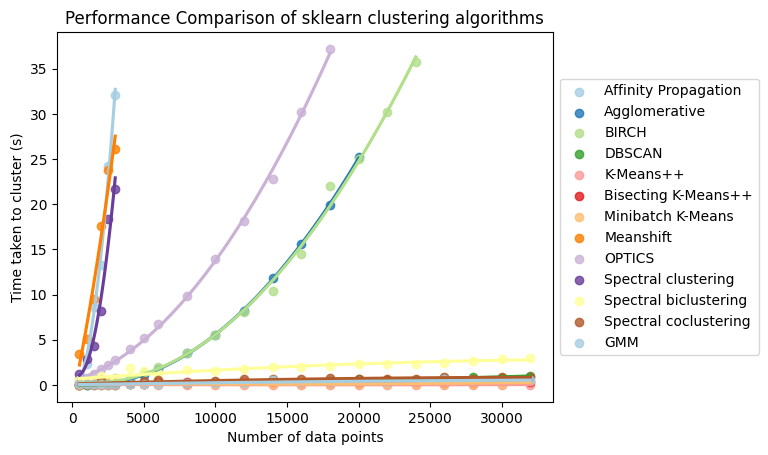

In [5]:
sns.regplot(x='sample_size', y=df.columns[1], data=df, order=2, label='Affinity Propagation', ci=None)
sns.regplot(x='sample_size', y=df.columns[2], data=df, order=2, label='Agglomerative', ci=None)
sns.regplot(x='sample_size', y=df.columns[3], data=df, order=2, label='BIRCH', ci=None)
sns.regplot(x='sample_size', y=df.columns[4], data=df, order=2, label='DBSCAN', ci=None)
sns.regplot(x='sample_size', y=df.columns[5], data=df, order=2, label='K-Means++', ci=None)
sns.regplot(x='sample_size', y=df.columns[6], data=df, order=2, label='Bisecting K-Means++', ci=None)
sns.regplot(x='sample_size', y=df.columns[7], data=df, order=2, label='Minibatch K-Means', ci=None)
sns.regplot(x='sample_size', y=df.columns[8], data=df, order=2, label='Meanshift', ci=None)
sns.regplot(x='sample_size', y=df.columns[9], data=df, order=2, label='OPTICS', ci=None)
sns.regplot(x='sample_size', y=df.columns[10], data=df, order=2, label='Spectral clustering', ci=None)
sns.regplot(x='sample_size', y=df.columns[11], data=df, order=2, label='Spectral biclustering', ci=None)
sns.regplot(x='sample_size', y=df.columns[12], data=df, order=2, label='Spectral coclustering', ci=None)
sns.regplot(x='sample_size', y=df.columns[13], data=df, order=2, label='GMM', ci=None)

#plt.gca().axis([0, 30000, -2, 45])
plt.gca().set_xlabel('Number of data points')
plt.gca().set_ylabel('Time taken to cluster (s)')
plt.title('Performance Comparison of sklearn clustering algorithms')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Medium datasize test

Remove from consderation slow algorithms and move on to larger sample sizes

In [6]:
# Define larger dataset sizes
large_dataset_sizes=np.arange(1,11) * 20000

# Fit algorithms

dbscan = benchmark_sklearn(large_dataset_sizes, sklearn.cluster.DBSCAN().fit, (), {}, sample_size=5)

kmeans = benchmark_sklearn(large_dataset_sizes, sklearn.cluster.KMeans(10, init="k-means++", n_init=1).fit, (), {}, sample_size=5)

bisecting_kmeans = benchmark_sklearn(large_dataset_sizes, sklearn.cluster.BisectingKMeans(10, init='k-means++', n_init=1).fit, (), {}, sample_size=5)

minibatch_kmeans = benchmark_sklearn(large_dataset_sizes, sklearn.cluster.MiniBatchKMeans(10, init="k-means++", n_init=1).fit, (), {}, sample_size=5)

spectral_biclut = benchmark_sklearn(large_dataset_sizes, sklearn.cluster.SpectralBiclustering(10).fit, (), {}, sample_size=5)

spectral_coclust = benchmark_sklearn(large_dataset_sizes, sklearn.cluster.SpectralCoclustering().fit, (), {}, sample_size=5)

gmm = benchmark_sklearn(large_dataset_sizes, sklearn.mixture.GaussianMixture(10).fit, (), {}, sample_size=5)

Fitting DBSCAN for 20000 data points 0
Fitting DBSCAN for 20000 data points 1
Fitting DBSCAN for 20000 data points 2
Fitting DBSCAN for 20000 data points 3
Fitting DBSCAN for 20000 data points 4
Fitting DBSCAN for 40000 data points 0
Fitting DBSCAN for 40000 data points 1
Fitting DBSCAN for 40000 data points 2
Fitting DBSCAN for 40000 data points 3
Fitting DBSCAN for 40000 data points 4
Fitting DBSCAN for 60000 data points 0
Fitting DBSCAN for 60000 data points 1
Fitting DBSCAN for 60000 data points 2
Fitting DBSCAN for 60000 data points 3
Fitting DBSCAN for 60000 data points 4
Fitting DBSCAN for 80000 data points 0
Fitting DBSCAN for 80000 data points 1
Fitting DBSCAN for 80000 data points 2
Fitting DBSCAN for 80000 data points 3
Fitting DBSCAN for 80000 data points 4
Fitting DBSCAN for 100000 data points 0
Fitting DBSCAN for 100000 data points 1
Fitting DBSCAN for 100000 data points 2
Fitting DBSCAN for 100000 data points 3
Fitting DBSCAN for 100000 data points 4
Fitting DBSCAN for 1

Save results to .csv file

In [7]:
data_names=[kmeans, bisecting_kmeans, minibatch_kmeans, spectral_biclut, spectral_coclust, gmm]
df=dbscan
for algo in data_names:
  df=pd.merge(df, algo, on='sample_size', how='outer')
df.to_csv("large_data_sklearn_times.csv")

Plot results

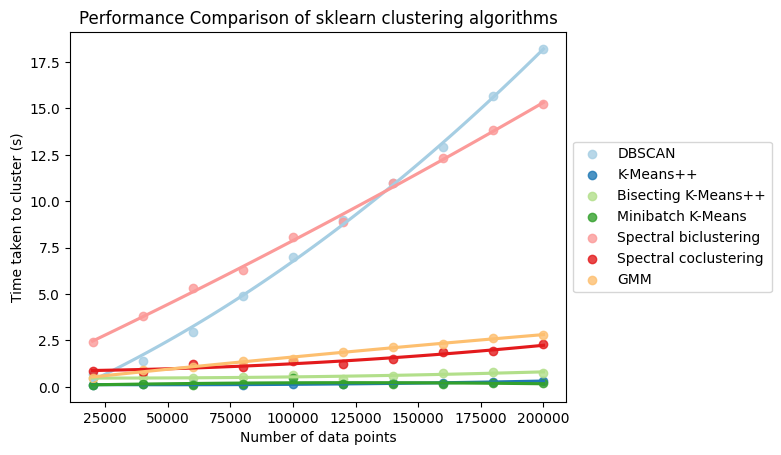

In [8]:
sns.regplot(x='sample_size', y=df.columns[1], data=df, order=2, label='DBSCAN', ci=None)
sns.regplot(x='sample_size', y=df.columns[2], data=df, order=2, label='K-Means++', ci=None)
sns.regplot(x='sample_size', y=df.columns[3], data=df, order=2, label='Bisecting K-Means++', ci=None)
sns.regplot(x='sample_size', y=df.columns[4], data=df, order=2, label='Minibatch K-Means', ci=None)
sns.regplot(x='sample_size', y=df.columns[5], data=df, order=2, label='Spectral biclustering', ci=None)
sns.regplot(x='sample_size', y=df.columns[6], data=df, order=2, label='Spectral coclustering', ci=None)
sns.regplot(x='sample_size', y=df.columns[7], data=df, order=2, label='GMM', ci=None)

#plt.gca().axis([0, 30000, -2, 45])
plt.gca().set_xlabel('Number of data points')
plt.gca().set_ylabel('Time taken to cluster (s)')
plt.title('Performance Comparison of sklearn clustering algorithms')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Large dataset test

Again, remove slowest performing algorithms and increase datasize

In [9]:
# Define larger dataset sizes
huge_dataset_sizes=np.arange(1,11) * 100000

# Fit algorithms

kmeans = benchmark_sklearn(huge_dataset_sizes, sklearn.cluster.KMeans(10, init="k-means++", n_init=1).fit, (), {}, sample_size=5)

bisecting_kmeans = benchmark_sklearn(huge_dataset_sizes, sklearn.cluster.BisectingKMeans(10, init='k-means++', n_init=1).fit, (), {}, sample_size=5)

minibatch_kmeans = benchmark_sklearn(huge_dataset_sizes, sklearn.cluster.MiniBatchKMeans(10, init="k-means++", n_init=1).fit, (), {}, sample_size=5)

spectral_coclust = benchmark_sklearn(huge_dataset_sizes, sklearn.cluster.SpectralCoclustering().fit, (), {}, sample_size=5)

gmm = benchmark_sklearn(huge_dataset_sizes, sklearn.mixture.GaussianMixture(10).fit, (), {}, sample_size=5)

Fitting KMeans for 100000 data points 0
Fitting KMeans for 100000 data points 1
Fitting KMeans for 100000 data points 2
Fitting KMeans for 100000 data points 3
Fitting KMeans for 100000 data points 4
Fitting KMeans for 200000 data points 0
Fitting KMeans for 200000 data points 1
Fitting KMeans for 200000 data points 2
Fitting KMeans for 200000 data points 3
Fitting KMeans for 200000 data points 4
Fitting KMeans for 300000 data points 0
Fitting KMeans for 300000 data points 1
Fitting KMeans for 300000 data points 2
Fitting KMeans for 300000 data points 3
Fitting KMeans for 300000 data points 4
Fitting KMeans for 400000 data points 0
Fitting KMeans for 400000 data points 1
Fitting KMeans for 400000 data points 2
Fitting KMeans for 400000 data points 3
Fitting KMeans for 400000 data points 4
Fitting KMeans for 500000 data points 0
Fitting KMeans for 500000 data points 1
Fitting KMeans for 500000 data points 2
Fitting KMeans for 500000 data points 3
Fitting KMeans for 500000 data points 4


Save results to .csv file

In [10]:
data_names=[bisecting_kmeans, minibatch_kmeans, spectral_coclust, gmm]
df=kmeans
for algo in data_names:
  df=pd.merge(df, algo, on='sample_size', how='outer')
df.to_csv("huge_data_sklearn_times.csv")

Plot results

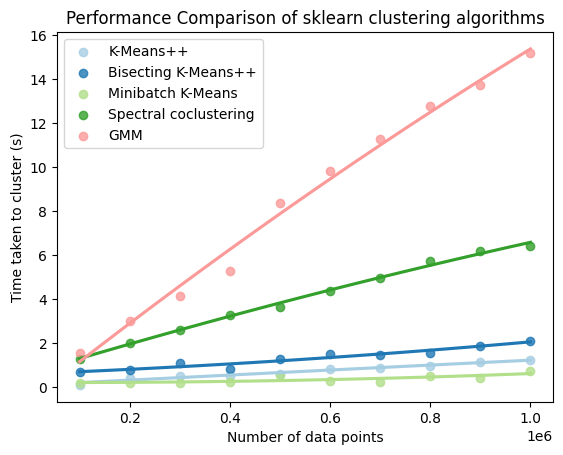

In [11]:
sns.regplot(x='sample_size', y=df.columns[1], data=df, order=2, label='K-Means++', ci=None)
sns.regplot(x='sample_size', y=df.columns[2], data=df, order=2, label='Bisecting K-Means++', ci=None)
sns.regplot(x='sample_size', y=df.columns[3], data=df, order=2, label='Minibatch K-Means', ci=None)
sns.regplot(x='sample_size', y=df.columns[4], data=df, order=2, label='Spectral coclustering', ci=None)
sns.regplot(x='sample_size', y=df.columns[5], data=df, order=2, label='GMM', ci=None)

#plt.gca().axis([0, 30000, -2, 45])
plt.gca().set_xlabel('Number of data points')
plt.gca().set_ylabel('Time taken to cluster (s)')
plt.title('Performance Comparison of sklearn clustering algorithms')
plt.legend()